In [1]:
# import all the important packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from scipy.stats import norm
import time 

In [2]:
# reading in the multiclass data set
redwine_multiclass_train = pd.read_csv('training.csv')
redwine_multiclass_val = pd.read_csv('validation.csv')
redwine_multiclass_test = pd.read_csv('testing.csv')
# seperating into our covariates/feratures and our response variable
# can get the response variable by just dropping the `quality` column (which is our response variable)
X_t = redwine_multiclass_train.drop('class', axis=1)
X_te = redwine_multiclass_test.drop('class', axis=1)
X_v = redwine_multiclass_val.drop('class', axis=1)
# now get the response variable by just getting the `quality` column
Y_t = redwine_multiclass_train['class']
Y_te = redwine_multiclass_test['class']
Y_v = redwine_multiclass_val['class']
# lets see what happends when we split the data manually

X_train = X_t.iloc[:, :]
X_test = X_te.iloc[:, :]
X_val = X_v.iloc[:, :]
Y_train = Y_t.iloc[:]
Y_test = Y_te.iloc[:]
Y_val = Y_v.iloc[:]

Text(0.5, 1.0, 'Figure 2: Data after standardisation')

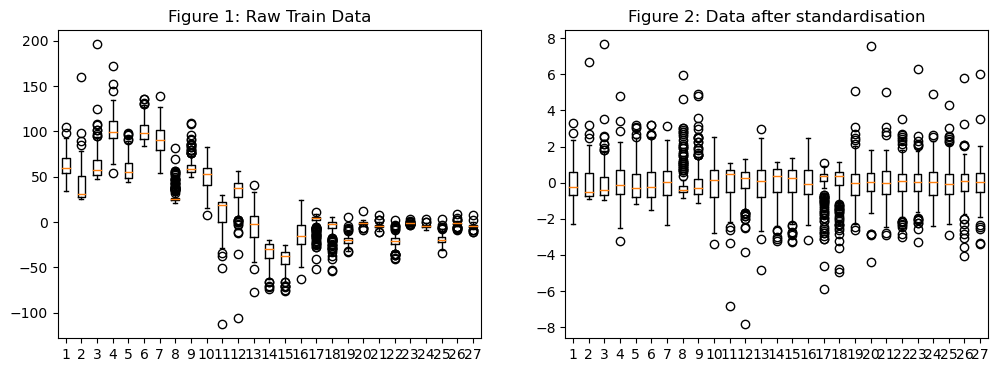

In [3]:
# plot box plot for the data
fig = plt.figure(figsize=[12,4])
ax = fig.add_subplot(1,2,1)
ax.boxplot(X_train)
ax.set_title('Figure 1: Raw Train Data')

# Standardise data
mu = np.mean(X_train, 0)
sigma = np.std(X_train, 0)
X_train = (X_train - mu)/sigma

# box plot after standardisation 
ax = fig.add_subplot(1,2,2)
ax.boxplot(X_train)
ax.set_title('Figure 2: Data after standardisation')

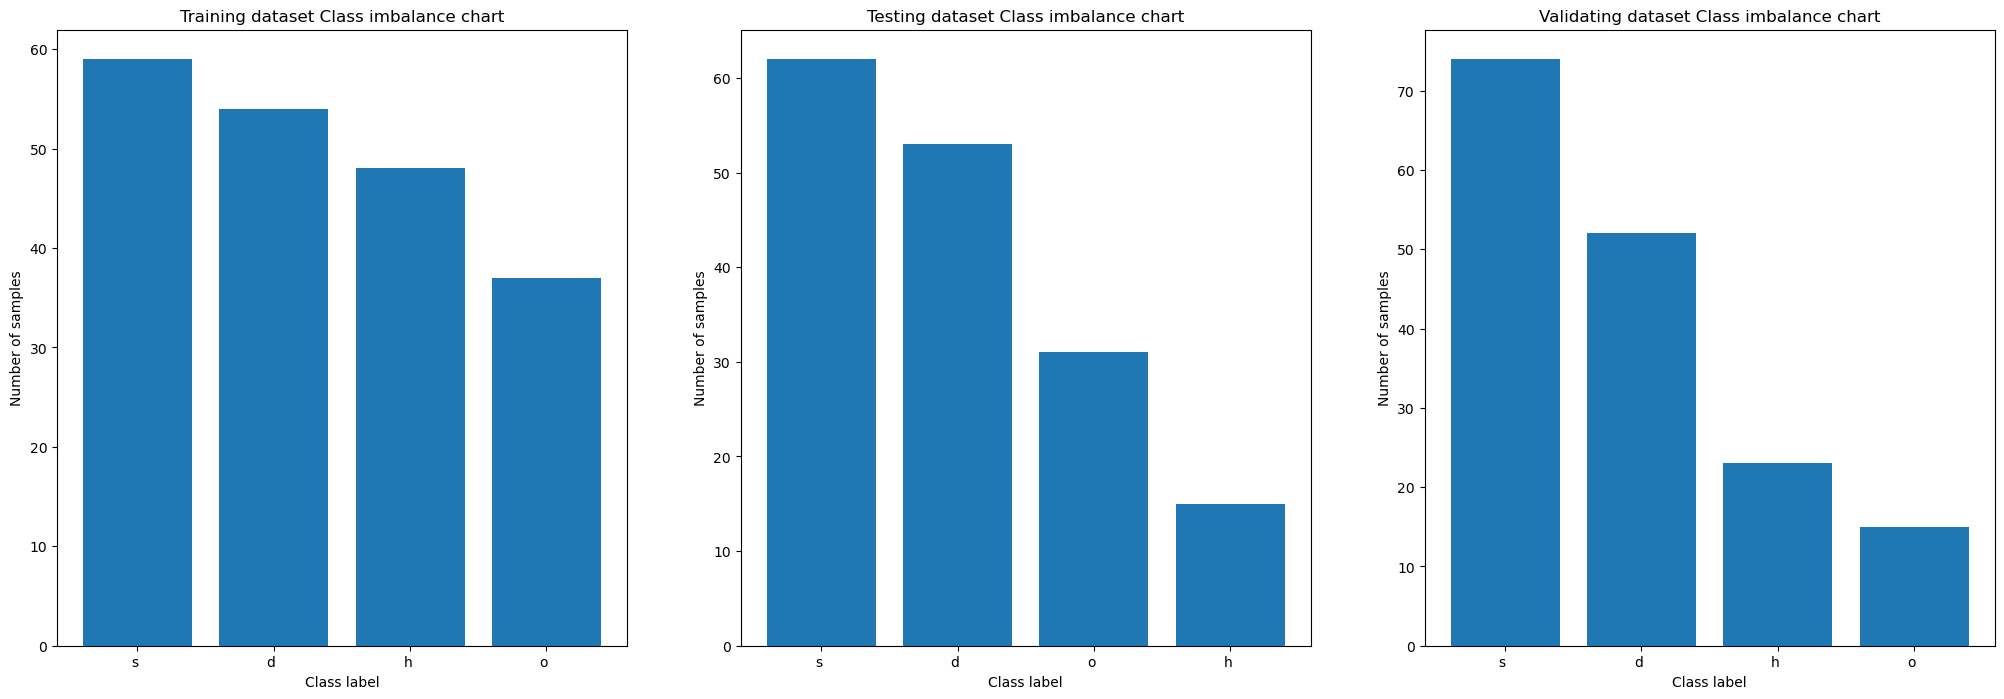

In [4]:
import matplotlib.pyplot as plt

# count the number of occurrences of each class label in the training set
counts_train = Y_train.value_counts()
counts_test = Y_test.value_counts()
counts_val = Y_val.value_counts()
fig = plt.figure(figsize=[25,8])
ax = fig.add_subplot(1,3,1)

# plot the results using a bar chart
plt.bar(counts_train.index, counts_train.values)

# add labels and title
plt.xlabel('Class label')
plt.ylabel('Number of samples')
plt.title('Training dataset Class imbalance chart')
ax = fig.add_subplot(1,3,2)

# plot the results using a bar chart
plt.bar(counts_test.index, counts_test.values)

# add labels and title
plt.xlabel('Class label')
plt.ylabel('Number of samples')
plt.title('Testing dataset Class imbalance chart')
ax = fig.add_subplot(1,3,3)

# plot the results using a bar chart
plt.bar(counts_val.index, counts_val.values)

# add labels and title
plt.xlabel('Class label')
plt.ylabel('Number of samples')
plt.title('Validating dataset Class imbalance chart')


# display the plot
plt.show()


In [5]:
# function to do our eval for us, this is quite simple and will
# - create a figure
# - draw a confusion matrix for the trainign data in a sub-fig on the left
# - draw a confusion matrix for the testing data in a sub-fig on the right
# - compute the overall classification accuracy on the testing data
# this has simply been created as we're going to do this for each test that we run
def eval_model(model, X_train, Y_train, X_test, Y_test):
    fig = plt.figure(figsize=[25, 8])
    ax = fig.add_subplot(1, 2, 1)
    conf = ConfusionMatrixDisplay.from_estimator(model, X_train, Y_train, normalize=None, xticks_rotation='vertical', ax=ax)
    pred = model.predict(X_train)
    conf.ax_.set_title('Training Set Performance: ' + str(sum(pred == Y_train)/len(Y_train)));
    ax = fig.add_subplot(1, 2, 2)
    conf = ConfusionMatrixDisplay.from_estimator(model, X_test, Y_test, normalize=None, xticks_rotation='vertical', ax=ax)
    pred = model.predict(X_test)
    conf.ax_.set_title('Testing Set Performance: ' + str(sum(pred == Y_test)/len(Y_test)));


<h1>SVM</h1>


Execution time: 5.9022321701049805 seconds
Best parameters: Cs = 10000000000, class_weights = balanced, kernel = linear, acc = 0.6118825197193849


OneVsOneClassifier(estimator=SVC(C=10000000000, class_weight='balanced',
                                 gamma=0.0001, kernel='linear'))

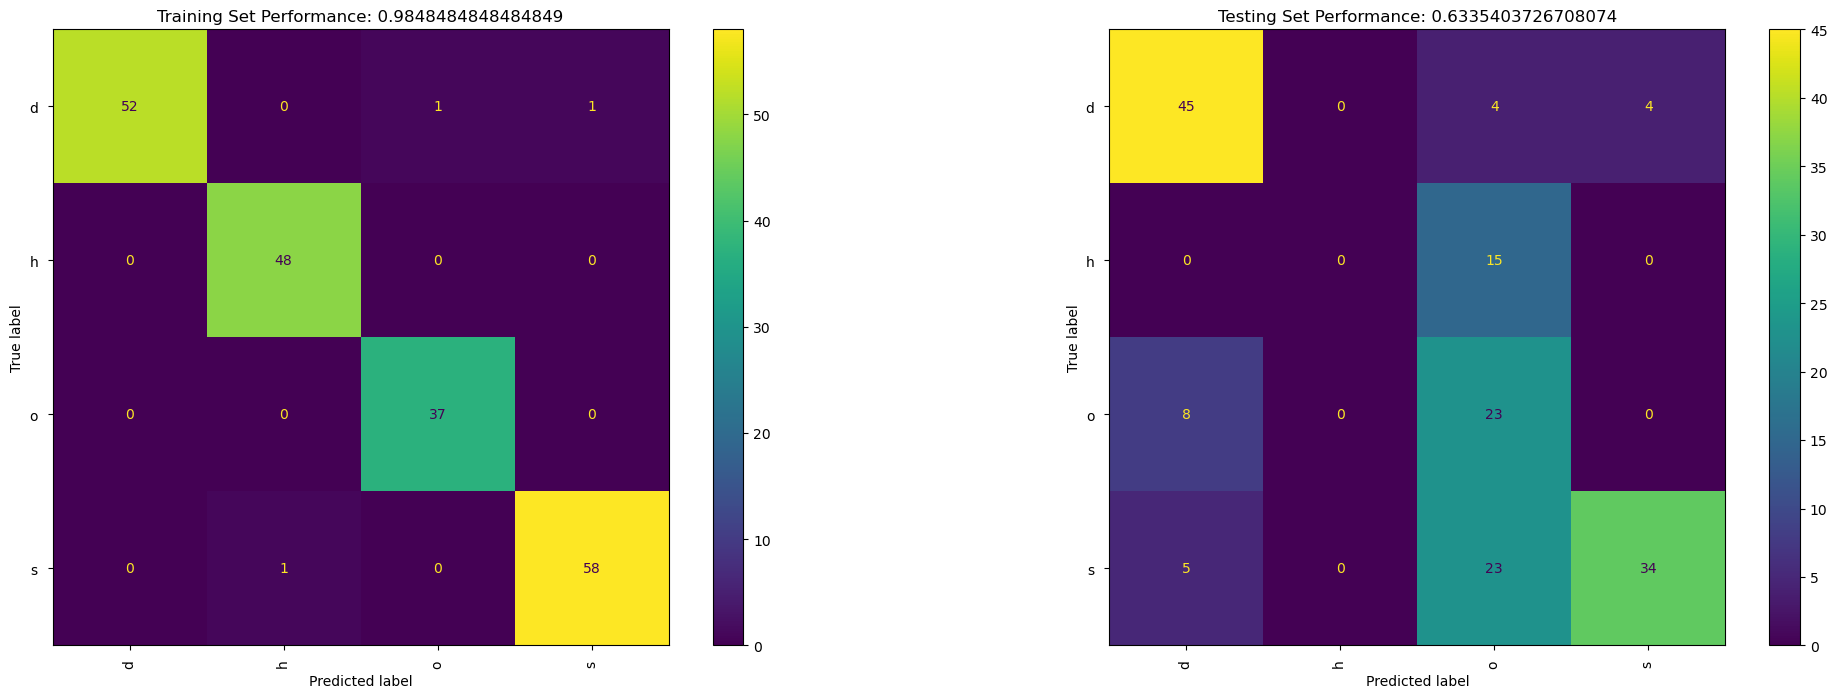

In [6]:
Cs = [10,20,50,150,999999999,10000000000]
ens_type = [0, 1]
class_weights = [None, 'balanced']
kernel = ['poly', 'rbf', 'sigmoid', 'linear']
gamma = [0.00000001, 0.001, 0.0001]
best_acc = 0
best_model = None

# Record the start time of the hyperparameter search
start_time = time.time()

for C in Cs:
    for e in ens_type:
        for w in class_weights:
            for k in kernel:
                for g in gamma:
            
                    if (e == 0):
                        svm = OneVsRestClassifier(SVC(C=C, class_weight=w, kernel=k, gamma=g)).fit(X_train, Y_train)
                    else:
                        svm = OneVsOneClassifier(SVC(C=C, class_weight=w, kernel=k, gamma=g)).fit(X_train, Y_train)

                    acc = f1_score(Y_val, svm.predict(X_val), average='weighted')
                    if (acc > best_acc):
                        best_acc = acc
                        best_model = svm
# Record the end time of the hyperparameter search
end_time = time.time()

# Print the execution time of the hyperparameter search
print(f"Execution time: {end_time - start_time} seconds")

# Print the best hyperparameters and accuracy
print("Best parameters: Cs = {}, class_weights = {}, kernel = {}, acc = {}".
      format(C, w, k, best_acc))

eval_model(best_model, X_train, Y_train, X_test, Y_test)
svm.estimator 
svm


In [7]:
from sklearn.metrics import classification_report

# Get predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Print the precision, recall, and F1-score for each class
print(classification_report(Y_test, y_pred))


              precision    recall  f1-score   support

          d        0.78      0.85      0.81        53
          h        0.00      0.00      0.00        15
          o        0.35      0.74      0.48        31
          s        0.89      0.55      0.68        62

    accuracy                           0.63       161
   macro avg       0.51      0.53      0.49       161
weighted avg       0.67      0.63      0.62       161



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<h1>RF</h1>


/tmp/ipykernel_472/539277720.py:21: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for e in tqdm(num_est):


  0%|          | 0/5 [00:00<?, ?it/s]

Execution time: 3.0014567375183105 seconds
Best parameters: num_est = 28, max_depth = 1, class_weight = None, acc = 0.45633536762569016
              precision    recall  f1-score   support

          d        0.38      0.70      0.49        53
          h        0.00      0.00      0.00        15
          o        0.87      0.84      0.85        31
          s        0.62      0.34      0.44        62

    accuracy                           0.52       161
   macro avg       0.47      0.47      0.45       161
weighted avg       0.53      0.52      0.50       161



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


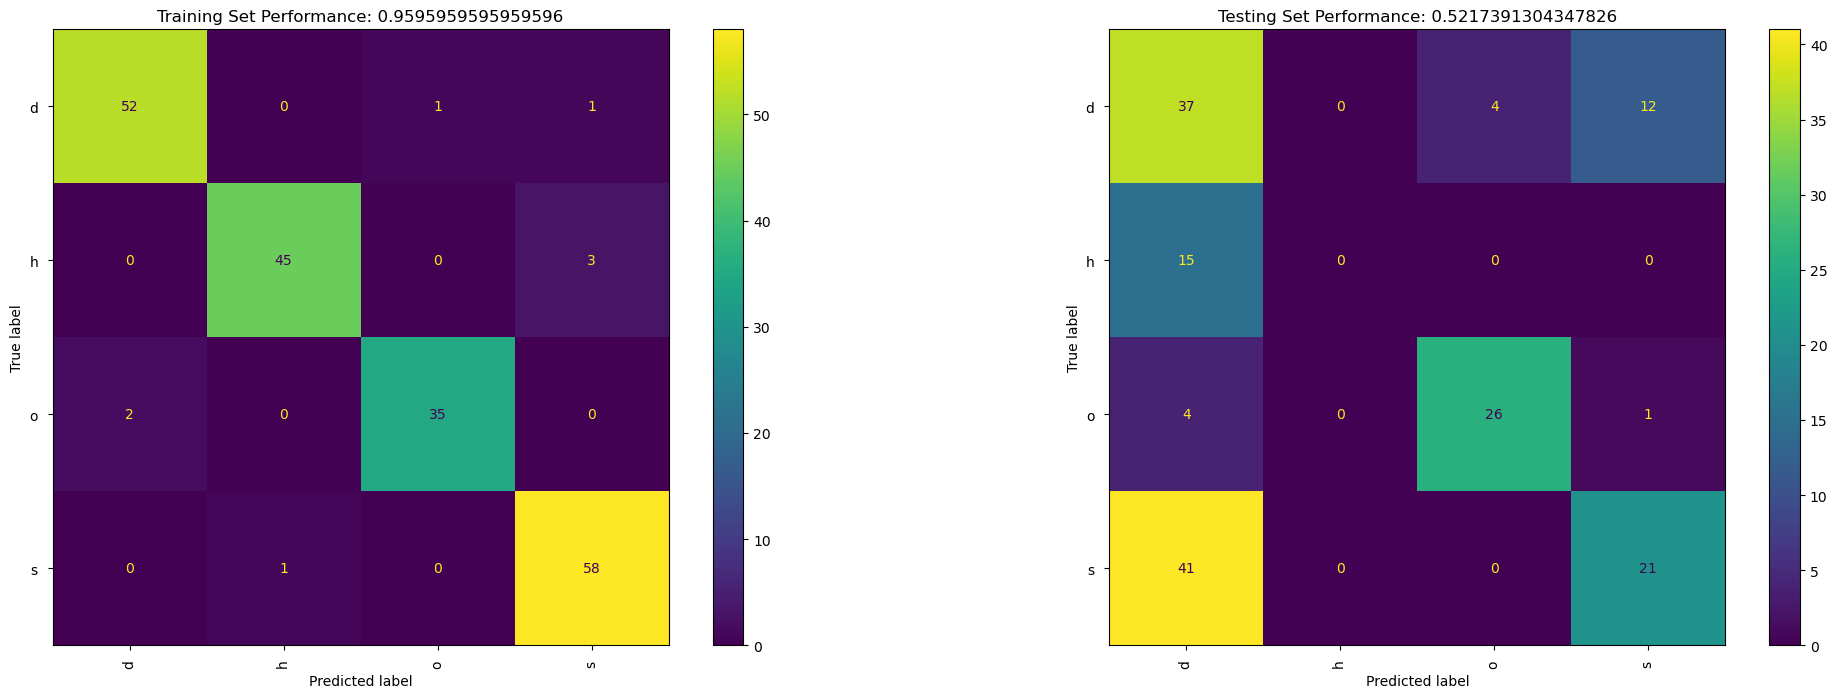

In [8]:
# Import necessary libraries
from tqdm import tqdm_notebook as tqdm
from sklearn.metrics import f1_score

# Define hyperparameters to search over
num_est = [10,20,25,28,30]
max_depth = [1, 2, 3,4, 5]
class_weights = [None, 'balanced', 'balanced_subsample']

# Initialize variables to store the best model and hyperparameters
best_acc = 0
best_model = None
best_num_est = None
best_max_depth = None
best_class_weight = None

# Record the start time of the hyperparameter search
start_time = time.time()

# Loop over all combinations of hyperparameters
for e in tqdm(num_est):
    for d in max_depth:
        for w in class_weights:
            
            # Train a random forest model with the current hyperparameters
            rf = RandomForestClassifier(n_estimators=e, max_depth=d, random_state=42, class_weight=w).fit(X_train, Y_train)

            # Evaluate the model on the validation set
            acc = f1_score(Y_val, rf.predict(X_val), average='macro')
            
            # Update the best model and hyperparameters if the current model has higher accuracy
            if acc > best_acc:
                best_acc = acc
                best_model = rf
                best_num_est = e
                best_max_depth = d
                best_class_weight = w

# Record the end time of the hyperparameter search
end_time = time.time()

# Print the execution time of the hyperparameter search
print(f"Execution time: {end_time - start_time} seconds")

# Print the best hyperparameters and accuracy
print("Best parameters: num_est = {}, max_depth = {}, class_weight = {}, acc = {}".
      format(best_num_est, best_max_depth, best_class_weight, best_acc))

# Evaluate the best model on the training and test sets
eval_model(best_model, X_train, Y_train, X_test, Y_test)


# Get predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Print the precision, recall, and F1-score for each class
print(classification_report(Y_test, y_pred))

Execution time: 0.32289767265319824 seconds
acc 0.2805902848944456
              precision    recall  f1-score   support

          d        0.00      0.00      0.00        53
          h        0.00      0.00      0.00        15
          o        0.00      0.00      0.00        31
          s        0.39      1.00      0.56        62

    accuracy                           0.39       161
   macro avg       0.10      0.25      0.14       161
weighted avg       0.15      0.39      0.21       161

              precision    recall  f1-score   support

          d        0.00      0.00      0.00        54
          h        0.00      0.00      0.00        48
          o        0.00      0.00      0.00        37
          s        0.30      1.00      0.46        59

    accuracy                           0.30       198
   macro avg       0.07      0.25      0.11       198
weighted avg       0.09      0.30      0.14       198



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classif

KNeighborsClassifier(metric='manhattan', n_neighbors=198, weights='distance')

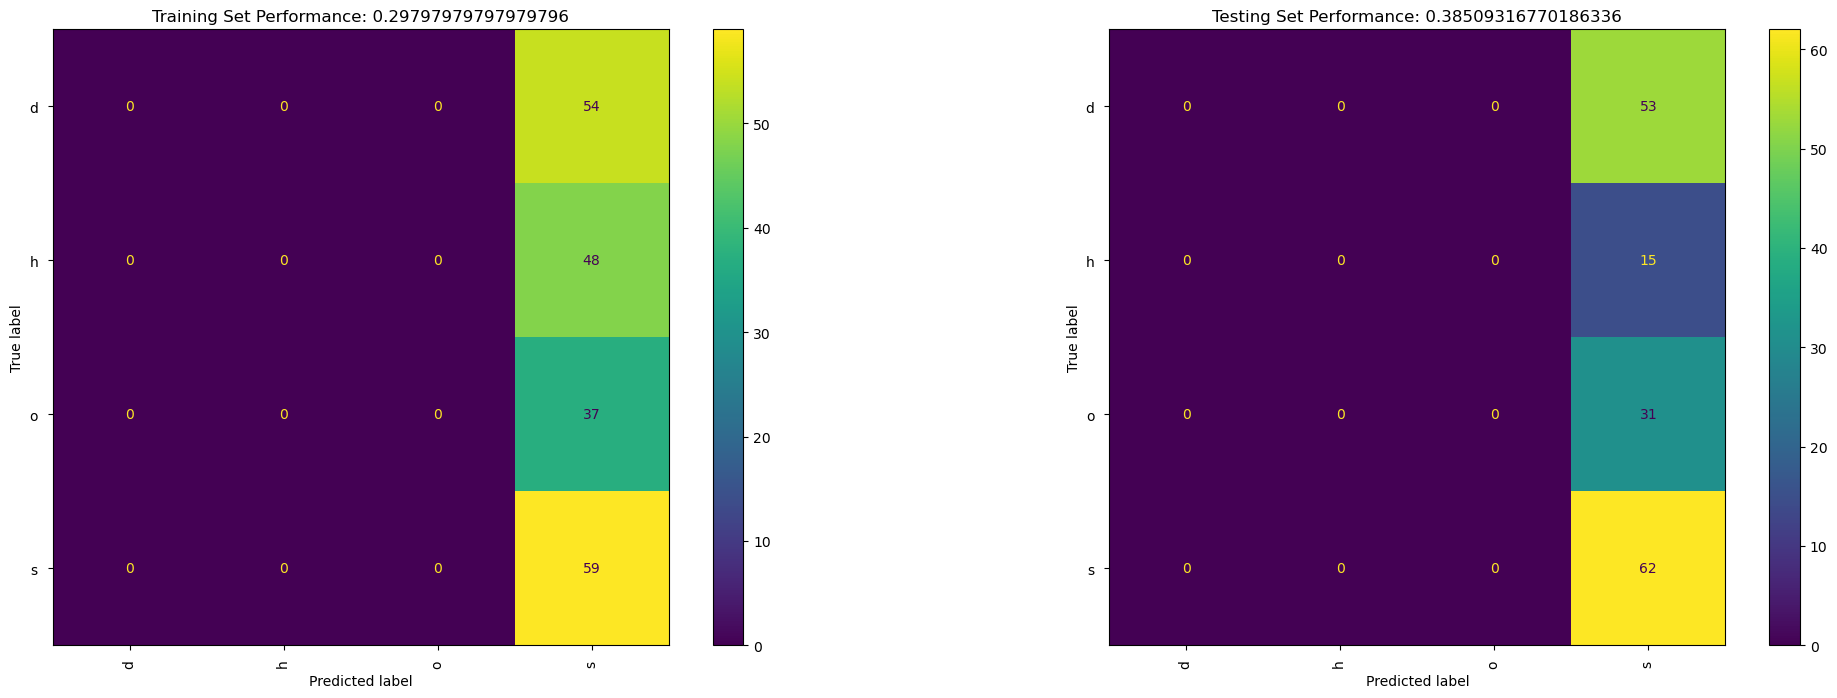

In [9]:
neighbours = [1, 2, 4, 8, 16,32,64, 198]
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan']

best_acc = 0
best_model = None

# Record the start time of the hyperparameter search
start_time = time.time()
for k in neighbours:
    for w in weights:
        for m in metric:
            cknn = KNeighborsClassifier(n_neighbors=k, weights=w, metric=m).fit(X_train, Y_train)
            acc = f1_score(Y_val, cknn.predict(X_val), average='weighted')
            if (acc > best_acc):
                best_acc = acc
                best_model = cknn

# Record the end time of the hyperparameter search
end_time = time.time()

# Print the execution time of the hyperparameter search
print(f"Execution time: {end_time - start_time} seconds")

eval_model(best_model, X_train, Y_train, X_test, Y_test)
cknn
# Get predictions on the test set using the best model
y_pred = best_model.predict(X_test)

print('acc', best_acc)
# Print the precision, recall, and F1-score for each class
print(classification_report(Y_test, y_pred))

y_pred = best_model.predict(X_train)
print(classification_report(Y_train, y_pred))
cknn

Bonus: CKNN
Let's finish up with a CKNN, and an arbitrary number of neighbours.

K-Nearest Neighbours Classifier
We'll now shift to our second method, K-Nearest Neighbours classification:

K-nearest neighbours is a classificaiton method based on the idea of clustering: points that are near each other will belong to the same class
It can model very non-linear decision boundaries
Trivial to extend to multi-class classification
But, it's sensitive to noise and outliers
Does not allow and easy way to work our what dimensions are important (no p-values)
Can run into problems when we have an uneven class distribution (i.e. not equal amounts of each type of output)
In it's most basic form, cKNN is pretty straight forward to use: